Noise Level 0.0: Accuracy = 0.9790
Noise Level 0.1: Accuracy = 0.9860
Noise Level 0.2: Accuracy = 0.9790
Noise Level 0.4: Accuracy = 0.9790
Noise Level 0.8: Accuracy = 0.9790
Noise Level 1.5: Accuracy = 0.9720
Noise Level 3.0: Accuracy = 0.9091
Noise Level 5.0: Accuracy = 0.8322


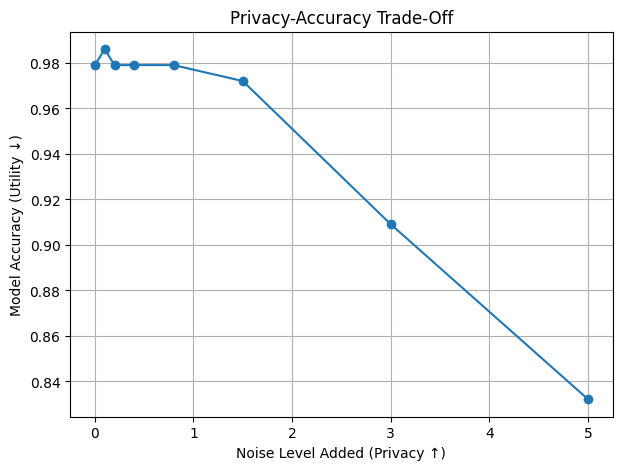

In [ ]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --- Step 1: Load the Breast Cancer Dataset ---
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# --- Step 2: Apply Noise (Simulated Differential Privacy) ---
# Extended noise levels to show clearer accuracy drop
noise_levels = [0.0, 0.1, 0.2, 0.4, 0.8, 1.5, 3.0, 5.0]
accuracies = []

for noise in noise_levels:
    # Add Gaussian noise to training data
    X_train_noisy = X_train + np.random.normal(0, noise, X_train.shape)

    # Train model on noisy data
    model_noisy = LogisticRegression(max_iter=200)
    model_noisy.fit(X_train_noisy, y_train)

    # Test on clean data
    acc = accuracy_score(y_test, model_noisy.predict(X_test))
    accuracies.append(acc)

    print(f"Noise Level {noise}: Accuracy = {acc:.4f}")


  # --- Step 3: Plot Privacy–Accuracy Trade-Off ---
plt.figure(figsize=(7,5))
plt.plot(noise_levels, accuracies, marker='o')
plt.xlabel("Noise Level Added (Privacy ↑)")
plt.ylabel("Model Accuracy (Utility ↓)")
plt.title("Privacy-Accuracy Trade-Off")
plt.grid(True)
plt.show()